In [1]:
def submit_test_wf(blocking=False, sleeptime=30):
    from aiida.orm import DataFactory, WorkflowFactory
    from aiida.work import submit, run
    from aiida.work.db_types import Int
    st_cls = DataFactory('structure')
    STRUCTURE_QUERY = st_cls.querybuild()
    STRUCTURE = STRUCTURE_QUERY.first()[0]
    TestWorkflow = WorkflowFactory('mc-vasp.test')
    if blocking:
        return run(TestWorkflow, structure=STRUCTURE, sleeptime=Int(sleeptime))
    else:
        running = submit(TestWorkflow, structure=STRUCTURE, sleeptime=Int(sleeptime))
        return running

In [2]:
from mc_vasp_example import vasp_example as vex
vex.load_dbenv_if_not_loaded()
from aiida.work import WorkChain, submit, run
from aiida.work.db_types import Str
from aiida.orm import load_node

class Minimal(WorkChain):
    @classmethod
    def define(cls, spec):
        super(Minimal, cls).define(spec)
        spec.outline(
            cls.run
        )
        spec.output('message', valid_type=Str)
        
    def run(self):
        self.out('message', 'Hello World')

In [3]:
wc = load_node(submit(Minimal).pid)

In [4]:
wc.has_aborted(), wc.has_failed(), wc.has_finished_ok()

(False, False, False)

In [3]:
running = submit_test_wf(blocking=False, sleeptime=30)

In [4]:
running.pid

2793

In [81]:
wc = load_node(3607)

In [79]:
wc.get_inputs_dict()

{u'num_procs': 1,
 u'queue_name': u'batch',
 u'relax_ISIF': 3,
 u'relax_kpts_dist': 0.3,
 u'structure': <StructureData: uuid: 6f2b2067-fff4-4f43-beac-6d9d8044709a (pk: 2440)>,
 u'vasp_codename': u'vasp@theospc'}

In [73]:
wc.get_outputs_dict()

{u'CALL': <VaspCalculation: uuid: 21d32359-3a97-4fc8-9fd9-cc413455935e (pk: 3610)>,
 u'CALL_3610': <VaspCalculation: uuid: 21d32359-3a97-4fc8-9fd9-cc413455935e (pk: 3610)>,
 u'CALL_3617': <WorkCalculation: uuid: c19a16a6-cf9c-4b1b-8f82-863f9d988323 (pk: 3617)>,
 u'CALL_3624': <VaspCalculation: uuid: 6f64b65f-64d6-4c15-a36b-5b61608d3dee (pk: 3624)>,
 u'bands': <BandsData: uuid: 19b3c302-8c3d-4600-b9c6-94dd2313d046 (pk: 3629)>,
 u'bands_3629': <BandsData: uuid: 19b3c302-8c3d-4600-b9c6-94dd2313d046 (pk: 3629)>}

In [13]:
wc.get_state()

u'FAILED'

In [15]:
running

{'kpoints': <KpointsData: uuid: 907d07e3-0c25-4359-b9b7-13f972cd8108 (pk: 2785)>,
 'structure': <StructureData: uuid: bcc63abd-2b2d-4597-8e5c-eee22f81ec42 (pk: 2784)>}

In [74]:
calc = load_node(3624)

In [76]:
calc.inp.structure.get_formula()

'Al'

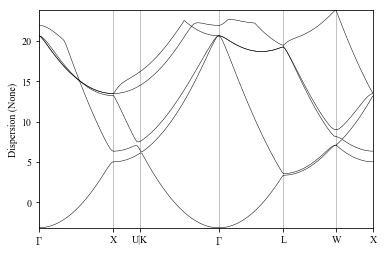

In [83]:
wc.out.bands.show_mpl()

In [37]:
from aiida.orm import WorkflowFactory

In [39]:
inps = WorkflowFactory('mc-vasp.example').get_inputs_template()

In [45]:
wc.get_inputs_dict()

{u'num_procs': 1,
 u'queue_name': u'batch',
 u'relax_ISIF': 3,
 u'relax_kpts_dist': 0.3,
 u'structure': <StructureData: uuid: 6f2b2067-fff4-4f43-beac-6d9d8044709a (pk: 2440)>,
 u'vasp_codename': u'vasp@theospc'}

In [65]:
import json
json.loads(calc.get_attr('last_jobinfo'))

AttributeError: DbAttribute with key last_jobinfo for node 3404 not found in db